In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [3]:
wzp = -0.029 # Quasar Correction; defined in Bailor-Jones but computed in Lindegren et al. 2018

In [4]:
# Posterior PDF from Bailor-Jones et al.

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    NB, r > 0
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
    #px = px + 0.029 #Quasar correction already accounted for 
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans


In [5]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J1804 parallax measurements

In [6]:
pxmax = .1
pxmin = .4
gx = np.linspace(pxmax, pxmin, 1000)

In [7]:
# s/n of detection
(0.2395-0.029)/ 0.2565

0.820662768031189

In [8]:
# No parallax distance measurement from pulsar timing

In [9]:
# Gaia parallax
pxGDR2 = 0.2395 - wzp
pxGDR2err = 0.2565

In [10]:
dx = np.linspace(1000/pxmin, 1000/pxmax,1000)

In [11]:
# Corrected Bailer-Jones distance estimate
dist_BJ_1804 = np.linspace(600, 12000, 1000)
bj_1804 = []
for r in dist_BJ_1804:
    bj_1804.append(pOfR(r,0.2395, 0.2565,2.13108557645661))

In [12]:
# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE_1804 = 776
eplus_DM_NE_1804 = 102
eminus_DM_NE_1804 = 108

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW_1804 = 800.5 # no errors reported here...

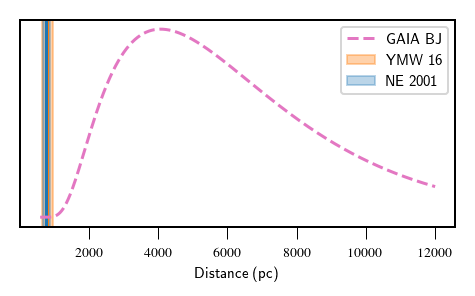

In [13]:
fig, ax1 = plt.subplots()

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1804*.8, d_DM_YMW_1804*1.2, alpha=0.35, color = "C1", label = "YMW 16")
plt.axvline(d_DM_YMW_1804, ymin=0, ymax=1, color = "C1")

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1804 - eminus_DM_NE_1804, d_DM_NE_1804+ eplus_DM_NE_1804, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE_1804, ymin=0, ymax=1, color = "C0")

# GAIA distance, to be updated
#plt.plot(1/gx1804*1000, dist_gaia1804.pdf(gx1804), label = "GAIA", color = "C5", linestyle='dashed')
plt.plot(dist_BJ_1804, np.array(bj_1804), label = "GAIA BJ", color = "C6", linestyle='dashed')



ax1.set_yticklabels([])
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.legend()
plt.tight_layout()

#plt.savefig("J1804_distances_wbj.pdf")